In [13]:
import sdf
import numpy as np

In [24]:
files_dir = "../rtfiles/pau-search/L1/"
prefix = "AdS5xS5_L1_"
var_name = "omega_tl1"
num_procs = 6
files = np.empty(num_procs,dtype=object)
for i in range(0,num_procs):
    files[i] = files_dir + prefix + var_name + "_" + str(i) + ".sdf" 
    #print files[i]

In [56]:
data2d = sdf.loadSDFFiles(files)
data2d_time=sdf.groupByTime(data2d)

In [37]:
print len(data2d_time)
print data2d_time[-1]
print len(data2d_time[0][1])

2
[0.0, 0.0015625]
6


In [74]:
len(data2d)

12

In [49]:
data2d[0]._dx

array([0.015625, 0.015625])

In [72]:
data2d[8].bbox

array([0.453125, 1.      , 0.28125 , 0.703125])

In [81]:
print len(data2d_time)
print len(data2d_time[0])
print len(data2d_time[0][0])

2
2
6


In [77]:
data2d[11].time

0.0015625

In [85]:
data2d_time[0][1][0].time

0.0015625

In [86]:
data2d_time[0][0][0].bbox

array([0.      , 0.53125 , 0.      , 0.359375])

<IPython.core.display.Javascript object>


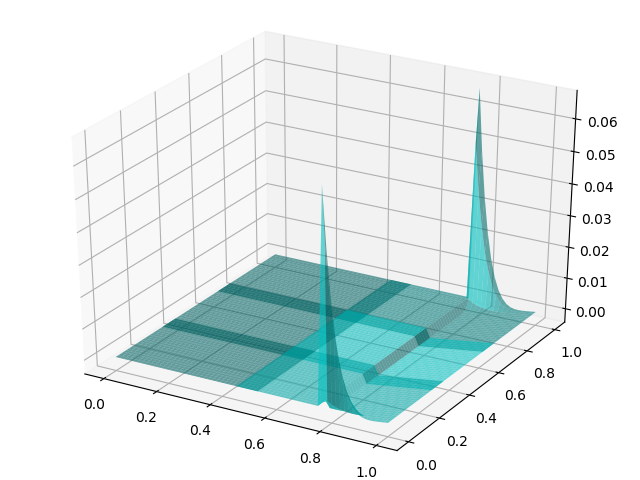

time = 0.001563


In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

plt.ion()
fig=plt.figure()
ax=Axes3D(fig)
#ax.set_aspect('equal')

tt=1

print "time = %f" % data2d_time[0][tt][0].time

x1 = range(0,len(data2d_time[0][tt]))
x2 = range(0,len(data2d_time[0][tt]))

for i in range(0,len(data2d_time[0][tt])):
    x1[i] = np.linspace(data2d_time[0][tt][i].bbox[0], data2d_time[0][tt][i].bbox[1], 
                        num=data2d_time[0][tt][i].shape[0])
    x2[i] = np.linspace(data2d_time[0][tt][i].bbox[2], data2d_time[0][tt][i].bbox[3], 
                        num=data2d_time[0][tt][i].shape[1])
    X,Y = np.meshgrid(x1[i],x2[i])
    ax.plot_surface(X,Y,data2d_time[0][tt][i]._data.T,
                    rstride=1,cstride=1,color='c', alpha=0.6)
    
#ax.auto_scale_xyz([0, 1], [-6, 6], [-0.1, 0.3])
plt.show()
fig.savefig('time1_omega.pdf')